<a href="https://colab.research.google.com/github/czajkuba/Cifar10/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 45s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

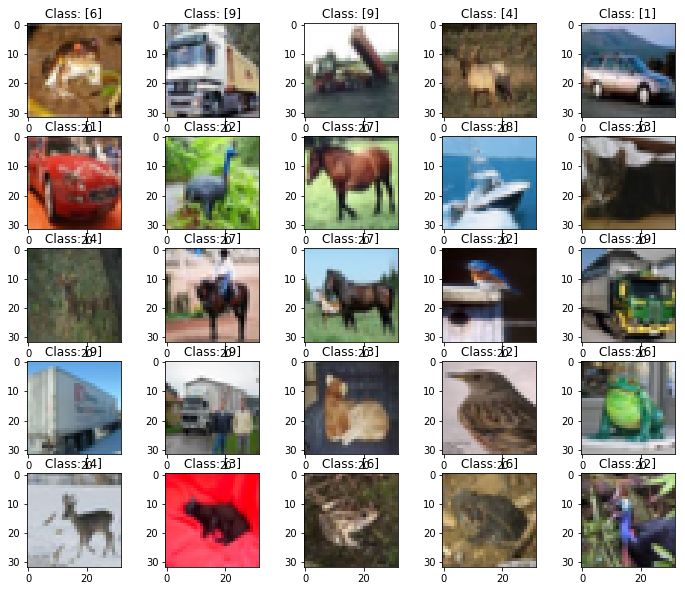

In [3]:
plt.figure(figsize=(12,10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title("Class: {}".format(y_train[idx]))

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(-1, img_rows, img_cols, num_channels)
X_test = X_test.reshape(-1, img_rows, img_cols, num_channels)

input_shape = (img_rows, img_cols, num_channels)

In [0]:
if np.max(X_train) > 1: X_train = X_train/255
if np.max(X_test) > 1: X_test = X_test/255

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)
  
if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [12]:
model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=10, verbose=2,
    validation_data=(X_test, y_test)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.8729 - acc: 0.2818 - val_loss: 1.5803 - val_acc: 0.4143
Epoch 2/10
 - 8s - loss: 1.4915 - acc: 0.4480 - val_loss: 1.3302 - val_acc: 0.5194
Epoch 3/10
 - 8s - loss: 1.3391 - acc: 0.5135 - val_loss: 1.2683 - val_acc: 0.5375
Epoch 4/10
 - 8s - loss: 1.2265 - acc: 0.5616 - val_loss: 1.1253 - val_acc: 0.5987
Epoch 5/10
 - 8s - loss: 1.1595 - acc: 0.5852 - val_loss: 1.0700 - val_acc: 0.6200
Epoch 6/10
 - 8s - loss: 1.1021 - acc: 0.6077 - val_loss: 1.0010 - val_acc: 0.6502
Epoch 7/10
 - 8s - loss: 1.0446 - acc: 0.6307 - val_loss: 0.9825 - val_acc: 0.6520
Epoch 8/10
 - 8s - loss: 0.9989 - acc: 0.6480 - val_loss: 0.9392 - val_acc: 0.6738
Epoch 9/10
 - 8s - loss: 0.9689 - acc: 0.6586 - val_loss: 0.8836 - val_acc: 0.6908
Epoch 10/10
 - 8s - loss: 0.9292 - acc: 0.6725 - val_loss: 0.8637 - val_acc: 0.6958


In [13]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 130us/step


[0.8637080924987793, 0.6958]